# Challenge 
##### Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption .

    ● name: the user's name
    ● object_id: the user's id
    ● email: email address
    ● creation_source: how their account was created. This takes on one of 5 values:
        ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
        ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
        ○ ORG_INVITE: invited to an organization (as a full member)
        ○ SIGNUP: signed up via the website
        ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using Google email account for their login-id)
    ● creation_time: when they created their account
    ● last_session_creation_time: unix timestamp of last login
    ● opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    ● enabled_for_marketing_drip: whether they are on the regular marketing email drip
    ● org_id: the organization (group of users) they belong to
    ● invited_by_user_id: which user invited them to join (if applicable).

----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [5]:
take_u = pd.read_csv('takehome_users.csv', encoding='latin1')

take_u.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
take_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:
take_eng = pd.read_csv('takehome_user_engagement.csv')

take_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
take_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### Data Wrangling

First, we will explore how many times each visitor has logged in. Then we will include only those who have logged in more than two times in total.



In [97]:
total_visits = take_eng.groupby('user_id').sum()
total_visits = total_visits[total_visits['visited'] > 2]

total_visits.index

Int64Index([    2,    10,    20,    33,    42,    43,    50,    53,    59,
               60,
            ...
            11961, 11964, 11965, 11967, 11969, 11975, 11980, 11981, 11988,
            11991],
           dtype='int64', name='user_id', length=2248)

In [98]:
user_login = take_eng[take_eng['user_id'].isin(total_visits.index)]
user_login.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [99]:
type(user_login['time_stamp'].values[0])

str

Now, we will analyze how many visits each user had p/ week.
- Since the time_stamp is a string, we will need to convert it into a timestamp.

In [100]:
timestamp = [pd.Timestamp(x) for x in user_login['time_stamp']]
week = [x.week for x in timestamp]
day = [x.dayofweek for x in timestamp]

user_login['week'] = week
user_login['day'] = day

/Users/joaobecker/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/joaobecker/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
user_login.head()

,time_stamp,user_id,visited,week,day
1,2013-11-15 03:45:04,2,1,46,4
2,2013-11-29 03:45:04,2,1,48,4
3,2013-12-09 03:45:04,2,1,50,0
4,2013-12-25 03:45:04,2,1,52,2
5,2013-12-31 03:45:04,2,1,1,1


In [102]:
visits_week = user_login.groupby(['week', 'user_id', 'day']).sum()
visits_week.head()

visited
week user_id day         
1    2       1          1
     10      0          1
             2          1
             3          1
             4          1

In [104]:
visits_week['total_days'] = [1 for x in visits_week['visited']]

visits_week = visits_week.groupby(['week', 'user_id']).sum()
visits_week.head()

visited  total_days
week user_id                     
1    2              1           1
     10             5           5
     42             4           4
     43             1           1
     63             7           7

In [118]:
visits_week_three = visits_week[visits_week['total_days'] > 2]
visits_week_three = visits_week_three.reset_index(level='week')

visits_week_three.head()

,week,visited,total_days
user_id,,,
10,1,5,5
42,1,4,4
63,1,7,7
69,1,10,7
81,1,3,3


In [144]:
three_visits_week = [1 if x == True else 0 for x in take_u['object_id'].isin(visits_week_three.index).values]

take_u['three_visits_week'] = three_visits_week

take_u.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,three_visits_week
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [190]:
email_holder = [x.split('@')[1].split('.')[0] for x in take_u['email']]
take_u['email_holder'] = email_holder

In [196]:
timestamp = [pd.Timestamp(x) for x in take_u['creation_time']]
month = [x.month for x in timestamp]
week = [x.week for x in timestamp]
dayofweek = [x.dayofweek for x in timestamp]

take_u['month'] = month
take_u['week'] = week
take_u['dayofweek'] = dayofweek

In [198]:
take_u.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,three_visits_week,email_holder,month,week,dayofweek
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,yahoo,4,17,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,gustr,11,46,4
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,gustr,3,12,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,yahoo,5,21,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,yahoo,1,3,3


### Exploratory Data Analysis

In [199]:
user_three = take_u[take_u['three_visits_week'] == 1]
user_few_days = take_u[take_u['three_visits_week'] == 0]

print('Percentage of users that have logged in three or more times in a single week - {}'.format(round(len(user_three) / len(take_u) * 100, 2)))
print('Percentage of users that have not logged in three or more times in a single week - {}'.format(round(len(user_few_days) / len(take_u) * 100, 2)))



Percentage of users that have logged in three or more times in a single week - 12.04
Percentage of users that have not logged in three or more times in a single week - 87.96


As we can see, only 12.04% of all the users have logged in three times or more in a single week, or have adopted to the platform.

Therefore, what we are going to search is if a variable influences more than 12.04% in having a user login in three or more times in a single week.

##### Creation Source

In [200]:
user_three['creation_source'].value_counts()

ORG_INVITE            491
GUEST_INVITE          326
SIGNUP                275
SIGNUP_GOOGLE_AUTH    206
PERSONAL_PROJECTS     147
Name: creation_source, dtype: int64

In [201]:
user_three['creation_source'].value_counts() / take_u['creation_source'].value_counts() * 100

GUEST_INVITE          15.071660
ORG_INVITE            11.542078
PERSONAL_PROJECTS      6.963524
SIGNUP                13.176809
SIGNUP_GOOGLE_AUTH    14.873646
Name: creation_source, dtype: float64

As we can see above, the way their account was created has some influence in user adoption:
    - There is a 15.07% adoption if a user is invited to an organization as a guest (guest_invite)
    - There is a 14.8% adoption if a user signs up using Google Authentication
    - There is a 13.1% adoption if a user signs up via the website
    - There is a very small adoption if a user is invited to join another user's personal workspace
    
Therefore, the main takeway here is to increase the number of adoption from those that have been invited to join a user's personal workspace to created their own, and then increase the chance of adoption.    

##### Opted in to mailing list

In [202]:
user_three['opted_in_to_mailing_list'].value_counts()

0    1067
1     378
Name: opted_in_to_mailing_list, dtype: int64

In [203]:
user_three['opted_in_to_mailing_list'].value_counts() / take_u['opted_in_to_mailing_list'].value_counts() * 100

0    11.847657
1    12.625251
Name: opted_in_to_mailing_list, dtype: float64

Opting in to mailing list does not influence a user adoption that much. 
By opting-in to mailing list, there is slight increase in percentage to adoption than by "mere" chance. While if it does not opt-in to mailing list there is a slight decrease in percentage adoption.  

##### Enabled for marketing drip

In [204]:
user_three['enabled_for_marketing_drip'].value_counts()

0    1221
1     224
Name: enabled_for_marketing_drip, dtype: int64

In [205]:
user_three['enabled_for_marketing_drip'].value_counts() / take_u['enabled_for_marketing_drip'].value_counts() * 100

0    11.961207
1    12.500000
Name: enabled_for_marketing_drip, dtype: float64

Very similar to opting-in to mailing list. 

By enabling marketing drip, there is slight increase in percentage to adoption than by "mere" chance. While if it does not enabled marketing drip there is a slight decrease in percentage adoption.  

##### Organization ID

In [265]:
organization_id = (user_three[user_three['org_id'] > 5]['org_id'].value_counts()  / take_u[take_u['org_id'] > 5]['org_id'].value_counts() * 100).sort_values(ascending=False).head(25)
organization_id


387    50.000000
235    46.153846
270    42.857143
399    38.461538
415    37.500000
400    37.500000
345    35.714286
318    35.294118
306    33.333333
161    33.333333
395    33.333333
281    33.333333
392    31.250000
305    30.769231
62     30.769231
352    30.000000
291    29.411765
282    29.411765
280    29.411765
225    29.411765
366    29.411765
273    29.411765
388    28.571429
44     27.777778
117    27.272727
Name: org_id, dtype: float64

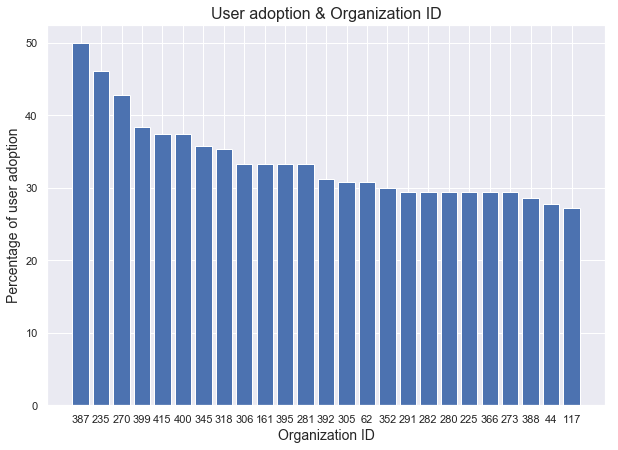

In [284]:
plt.figure(figsize=(10,7))
plt.bar([str(x) for x in organization_id.index], organization_id.values)
plt.xlabel('Organization ID', fontsize=14)
plt.ylabel('Percentage of user adoption', fontsize=14)
plt.title('User adoption & Organization ID', fontsize=16)
plt.show()

Here, we targeted only the organizations that have more than 5 users. 

And, as we can see, some organizations do look like playing a major role in user adoption. The organization with id 387 has 50% of its users adopting to the platform, and several organizations have more than 25% of their users adopting to the platform.

#### Email holder

In [251]:
user_three['email_holder'].value_counts().head(10)


gmail         479
yahoo         234
hotmail       181
jourrapide    151
gustr         130
cuvox         122
dieyh           1
vgtej           1
cnkkt           1
csmdd           1
Name: email_holder, dtype: int64

In [249]:
used_email_y = user_three[user_three['email_holder'].isin(user_three['email_holder'].value_counts().head(6).index)]['email_holder'].value_counts()
used_email_n = take_u[take_u['email_holder'].isin(take_u['email_holder'].value_counts().head(6).index)]['email_holder'].value_counts()



In [271]:
email_holder = (used_email_y / used_email_n * 100).sort_values(ascending=False)
email_holder

hotmail       15.536481
gmail         13.447501
jourrapide    11.993646
gustr         11.026293
cuvox         10.149750
yahoo          9.562730
Name: email_holder, dtype: float64

By looking at user email holder, we found that 15.5% of hotmail users have adopted to the platform, while only 9.5% of Yahoo users have adopted.

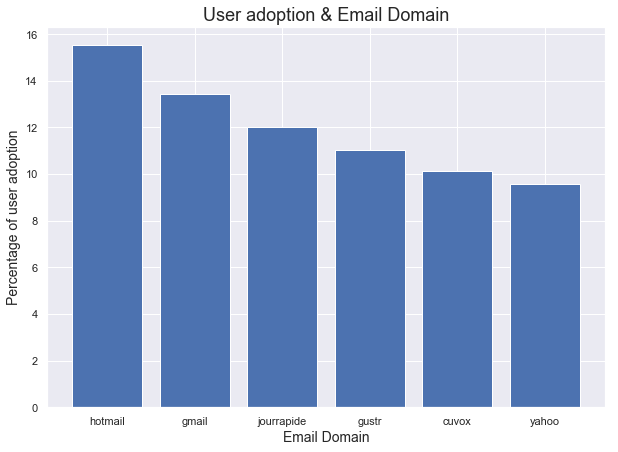

In [274]:
plt.figure(figsize=(10,7))
plt.bar(email_holder.index, email_holder.values)
plt.xlabel('Email Domain', fontsize=14)
plt.ylabel('Percentage of user adoption', fontsize=14)
plt.title('User adoption & Email Domain', fontsize=18)
plt.show()

#### Month

In [252]:
user_three['month'].value_counts()

10    154
6     137
11    135
8     131
1     131
9     130
3     126
2     117
12    116
7     111
4      89
5      68
Name: month, dtype: int64

In [277]:
month = (user_three['month'].value_counts() / take_u['month'].value_counts() * 100).sort_values(ascending=False)
month

10    16.666667
6     16.290131
8     15.375587
9     14.428413
11    14.423077
7     13.028169
1     12.730807
2     12.526767
12    12.473118
3     10.705183
4      7.613345
5      4.673540
Name: month, dtype: float64

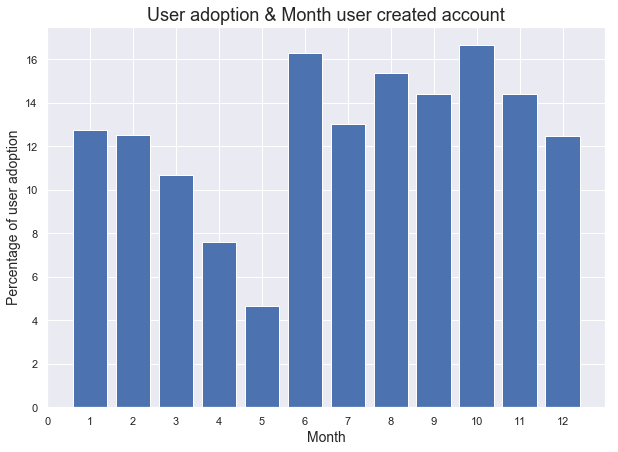

In [279]:
plt.figure(figsize=(10,7))
plt.bar(month.index, month.values)
plt.xticks(range(13))
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage of user adoption', fontsize=14)
plt.title('User adoption & Month user created account', fontsize=18)
plt.show()

By analazying the month users have created their account we found that those that created their account in april or may has a small chance of adoption, while those that have created their account in June or October has the highest chance of signing-up.

#### Week

In [261]:
user_three['week'].value_counts().sort_values(ascending=False).head(15)

3     42
47    38
44    37
40    37
24    36
32    35
37    35
39    34
23    33
42    33
41    33
7     33
35    32
13    32
46    32
Name: week, dtype: int64

In [288]:
top_week = (user_three['week'].value_counts() / take_u['week'].value_counts() * 100).sort_values(ascending=False).head(15)
top_week

23    20.000000
40    18.877551
34    18.452381
44    17.788462
3     17.573222
41    17.098446
25    16.756757
32    16.509434
39    16.346154
35    16.000000
46    15.686275
47    15.510204
24    15.384615
42    15.137615
37    15.086207
Name: week, dtype: float64

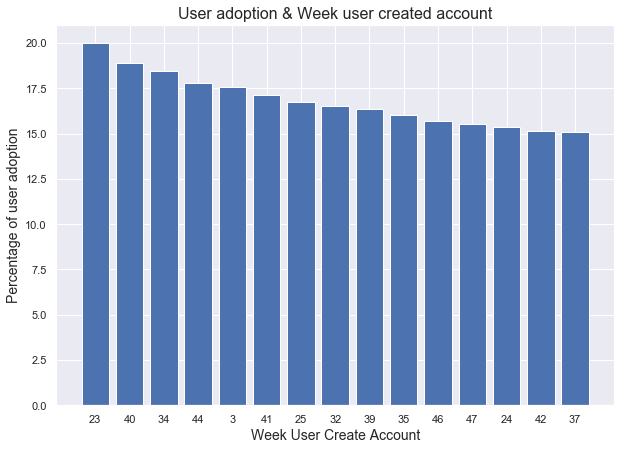

In [289]:
plt.figure(figsize=(10,7))
plt.bar([str(x) for x in top_week.index], top_week.values)
plt.xlabel('Week User Create Account', fontsize=14)
plt.ylabel('Percentage of user adoption', fontsize=14)
plt.title('User adoption & Week user created account', fontsize=16)
plt.show()

Some of the weeks do seem to have played some role in user adoption. Week 23 has 20% of users adopting to the platform, and several weeks where more than 15% of the users have adopted to the platform.

#### Day

In [263]:
user_three['dayofweek'].value_counts()

2    221
5    215
3    213
4    204
1    200
0    197
6    195
Name: dayofweek, dtype: int64

In [264]:
(user_three['dayofweek'].value_counts() / take_u['dayofweek'].value_counts() * 100)



0    11.507009
1    12.077295
2    13.084665
3    11.813644
4    11.196487
5    12.944010
6    11.768256
Name: dayofweek, dtype: float64

Day of the week does not seem to have played a major role in people adopting to the platform. There was a slight increase in percentage on Tuesday and Friday, while Saturday has slight decrease in percentage.

### Factors that predict future user adoption

Since only 12.04% of the users have adopted on the platform, the exploratory analysis focused on factors that provided a higher percentage of adoption. Therefore, not necessarily predicting user adoption, but focusing on what factors increase the chance of adoption.

The factors that have the most influence in user adoption is the organization they belong to and the week users created their account. Several organizations have over 30% of its user adopting on the platform. So, it is definitely worthwhile investigating the type of these organization and see if they have something in common. Also, some of the weeks the users have created their account have over 18% of the users adopting on the platform. While it is hard to identify the reason why these weeks had high user adoption, some of the factors could be, successful marketing campaigns and/or organizations sharing the platform to its employees.

Other factors that have a higher than the average user adoption are: creation source, user email and month the user has created their account. Creation source - there is a higher chance of adoption if a user has been invited to an organization as a guest and if the user has signed up using Google Authentication. Email - If a user signs up using a Hotmail email address, there is a higher than 15% chance of user adoption. Month - April and May seem to be the worst time for users to sign-up, only 4% (April) and 7% (May) of the users adopted on the platform, while June and October had over 16% user adoption.